# Povprečna sprememba stopinj za ohlajanje ali segrevanje mesečno na hišo

Podatki so pridobljeni iz https://ec.europa.eu/eurostat/web/energy/data/database?p_p_id=NavTreeportletprod_WAR_NavTreeportletprod_INSTANCE_QAMy7Pe6HwI1&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&p_p_col_id=column-2&p_p_col_count=1 , o količini stopinj segrevanja in ohlajanja dnevno na hišo od leta 2003 do 2018.

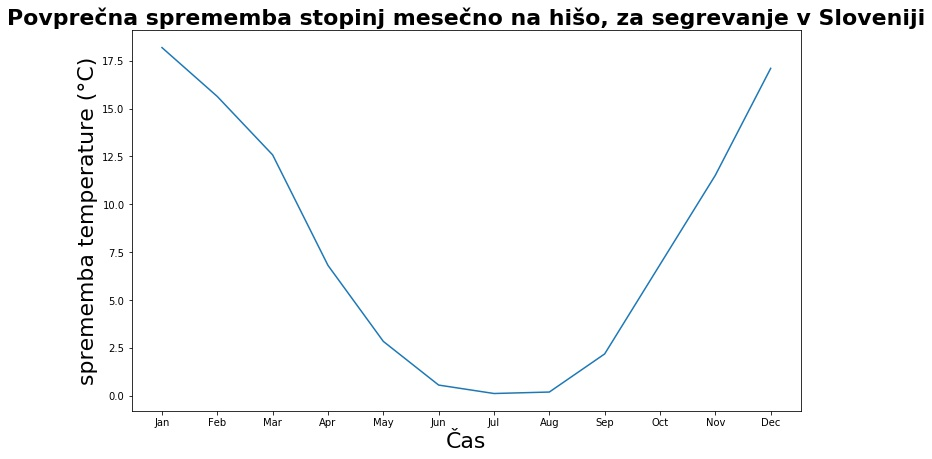

In [2]:
from pandas.compat import StringIO
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'jpg'
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

deltaTempForSlo = np.loadtxt('Podatki/Poraba energije v sloveniji/Stopinje za segrevanje in ohlajanje na mesec.csv', dtype=np.str, delimiter=",", skiprows=1, encoding='utf-8')
deltaTempForHeatingSlo = deltaTempForSlo[(deltaTempForSlo[:,3] == "Heating degree days") * (deltaTempForSlo[:,1] == "Slovenija")]
deltaTempForAllSlo = deltaTempForHeatingSlo[:,0::4]
deltaTemp = deltaTempForAllSlo[:,1].astype(np.float)
countYears = deltaTemp.size / 12
countYears = int(countYears)
meanDeltaT = np.array([])
for i in range(0,12):
    sum = np.sum(deltaTemp[i::12])
    mean = sum / countYears
    meanDeltaT = np.append(meanDeltaT, mean)
meanDeltaT = meanDeltaT / 30
months = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fontL = {'size'   : 22}
fontT = {'weight' : 'bold',
        'size'   : 22}
plt.figure(figsize=(12,7))
plt.ylabel('sprememba temperature (°C)', fontL)
plt.xlabel('Čas', fontL)
plt.title('Povprečna sprememba stopinj mesečno na hišo, za segrevanje v Sloveniji', fontT)
deltaTempPlotForSlo = plt.plot(months, meanDeltaT)



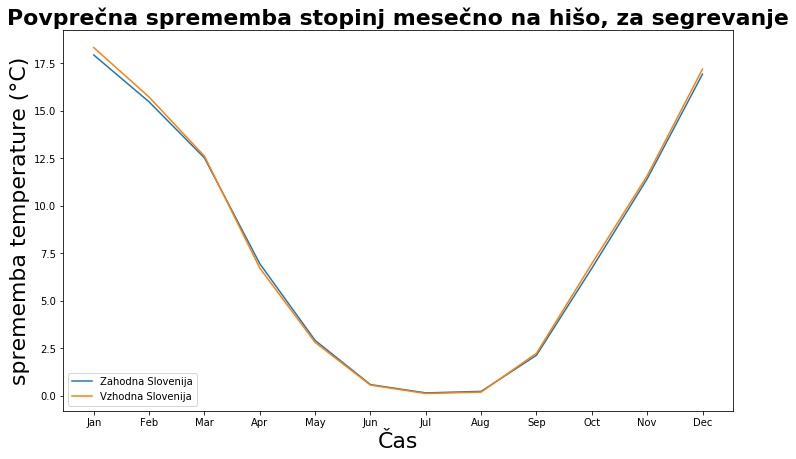

In [3]:
deltaTempForHeatingZSlo = deltaTempForSlo[(deltaTempForSlo[:,3] == "Heating degree days") * (deltaTempForSlo[:,1] == "Zahodna Slovenija (NUTS 2010)")]
deltaTempForZHSlo = deltaTempForHeatingZSlo[:,4]
deltaTempForZHSlo = deltaTempForZHSlo.astype(np.float)

meanDeltaZHT = np.array([])
for i in range(0,12):
    sum = np.sum(deltaTempForZHSlo[i::12])
    mean = sum / countYears
    meanDeltaZHT = np.append(meanDeltaZHT, mean)
meanDeltaZHT = meanDeltaZHT / 30    
deltaTempForHeatingVSlo = deltaTempForSlo[(deltaTempForSlo[:,3] == "Heating degree days") * (deltaTempForSlo[:,1] == "Vzhodna Slovenija (NUTS 2010)")]
deltaTempForVHSlo = deltaTempForHeatingVSlo[:,4]
deltaTempForVHSlo = deltaTempForVHSlo.astype(np.float)

meanDeltaVHT = np.array([])
for i in range(0,12):
    sum = np.sum(deltaTempForVHSlo[i::12])
    mean = sum / countYears
    meanDeltaVHT = np.append(meanDeltaVHT, mean)
meanDeltaVHT = meanDeltaVHT / 30
plt.figure(figsize=(12,7))
plt.ylabel('sprememba temperature (°C)', fontL)
plt.xlabel('Čas', fontL)
plt.title('Povprečna sprememba stopinj mesečno na hišo, za segrevanje', fontT)

deltaTempPlotForZSloHeat = plt.plot(months, meanDeltaZHT)
deltaTempPlotForVSloHeat = plt.plot(months, meanDeltaVHT)

legendForZVSloHeat = plt.legend(['Zahodna Slovenija', 'Vzhodna Slovenija'], loc='lower left')

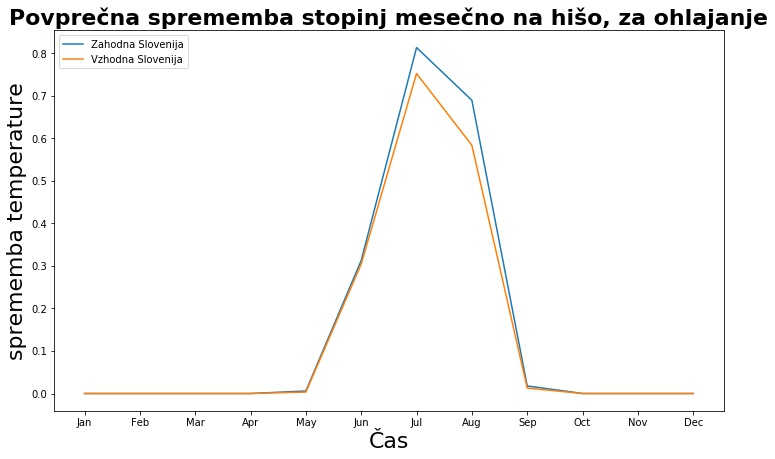

In [4]:
deltaTempForCoolingZSlo = deltaTempForSlo[(deltaTempForSlo[:,3] == "Cooling degree days") * (deltaTempForSlo[:,1] == "Zahodna Slovenija (NUTS 2010)")]
deltaTempForZCSlo = deltaTempForCoolingZSlo[:,4]
deltaTempForZCSlo = deltaTempForZCSlo.astype(np.float)

meanDeltaZCT = np.array([])
for i in range(0,12):
    sum = np.sum(deltaTempForZCSlo[i::12])
    mean = sum / countYears
    meanDeltaZCT = np.append(meanDeltaZCT, mean)
meanDeltaZCT = meanDeltaZCT / 30    
deltaTempForCoolingVSlo = deltaTempForSlo[(deltaTempForSlo[:,3] == "Cooling degree days") * (deltaTempForSlo[:,1] == "Vzhodna Slovenija (NUTS 2010)")]
deltaTempForVCSlo = deltaTempForCoolingVSlo[:,4]
deltaTempForVCSlo = deltaTempForVCSlo.astype(np.float)

meanDeltaVCT = np.array([])
for i in range(0,12):
    sum = np.sum(deltaTempForVCSlo[i::12])
    mean = sum / countYears
    meanDeltaVCT = np.append(meanDeltaVCT, mean)
meanDeltaVCT = meanDeltaVCT / 30
plt.figure(figsize=(12,7))
plt.ylabel('sprememba temperature', fontL)
plt.xlabel('Čas', fontL)
plt.title('Povprečna sprememba stopinj mesečno na hišo, za ohlajanje', fontT)

deltaTempPlotForZSloHeat = plt.plot(months, meanDeltaZCT)
deltaTempPlotForVSloHeat = plt.plot(months, meanDeltaVCT)

legendForZVSloHeat = plt.legend(['Zahodna Slovenija', 'Vzhodna Slovenija'], loc='upper left')

0.8976458333333294


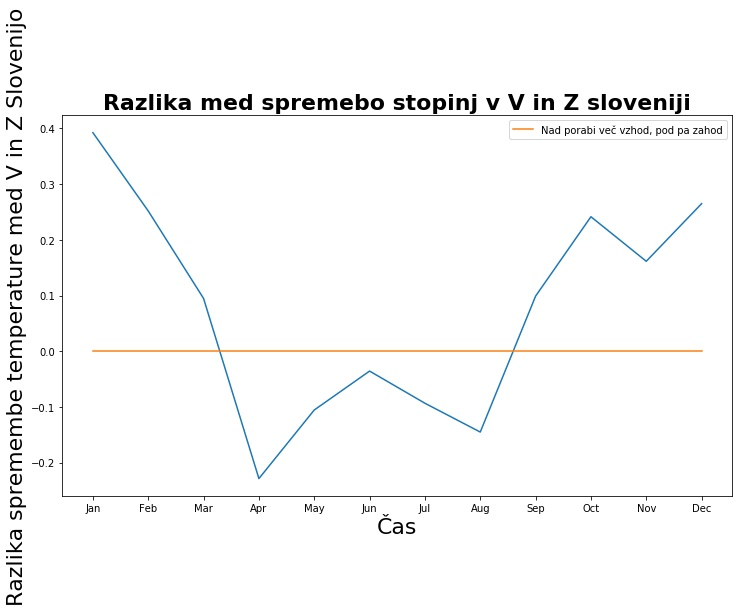

In [9]:
difForVZHeat = meanDeltaVHT - meanDeltaZHT
difForVZCool = meanDeltaVCT - meanDeltaZCT
sumForDeltaTVZ = difForVZHeat + difForVZCool

plt.figure(figsize=(12,7))
plt.ylabel('Razlika spremembe temperature med V in Z Slovenijo', fontL)
plt.xlabel('Čas', fontL)
plt.title('Razlika med spremebo stopinj v V in Z sloveniji', fontT)

deltaTempPlotForDifZV = plt.plot(months, sumForDeltaTVZ)
line = plt.plot(months, [0,0,0,0,0,0,0,0,0,0,0,0], label='Nad porabi več vzhod, pod pa zahod')
plt.legend()
#line.set_label('Nad porabi več vzhod, pod pa zahod')
print(np.sum(sumForDeltaTVZ))

Iz grafa vidimo kje v sloveniji se porabi več energije za segrevanje / ohlajanje hiš, v Vzhodni Sloveniji se porabi več energije za segrevanje hiš, v zahodni pa za ohlajanje. Povprečno čez leto, v vzhodni Sloveniji morajo več energije porabiti za ugodno temperaturo v domu, kot v zahodni sloveniji.